## Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [1]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cds_rl_2022` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# #@title set up mount symlink

# DRIVE_PATH = '/content/gdrive/My\ Drive/cds_rl_2022'
# DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
# if not os.path.exists(DRIVE_PYTHON_PATH):
#     !mkdir $DRIVE_PATH

# ## the space in `My Drive` causes some issues,
# ## make a symlink to avoid this
# SYM_PATH = '/content/cds_rl_2022'
# if not os.path.exists(SYM_PATH):
#     !ln -s $DRIVE_PATH $SYM_PATH

%cp -r '/content/gdrive/MyDrive/Colab Notebooks/Master degree/RL/hw2' ./

In [3]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        git-lfs \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg

# set up git lfs
!git lfs install

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3,397 kB]
Get:13 http:

In [4]:
#@title install mujoco-py

%pip install free-mujoco-py

# Cythonizes pkg on the first run
import mujoco_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.1 MB 25.4 MB/s 
     |████████████████████████████████| 203 kB 69.6 MB/s 
Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/

### Clone/update repo

Now we need to clone the HW2 codebase. There are two options:

1. Git clone the [repository](https://github.com/pkuderov/mipt-rl-hw-2022.git), install requirements, start coding HW2. This's the only option if you haven't cloned the repo yet for HW1. 
    If you have the repo already cloned, it's better to follow the 2-nd option. Otherwise, you will need to move the old `rl_hw` folder first. But don't delete it - make sure you've kept the HW1 solution as you will need it for this assignment!

2. Use already cloned local repository in `rl_hw`. Save the HW1 solution to the separate branch, then git pull changes from the remote upstream to get HW2 codebase.

In [5]:
# #@title clone homework repo (option #1)
# %cd $SYM_PATH
# !git clone https://github.com/pkuderov/mipt-rl-hw-2022.git rl_hw
# %cd rl_hw

In [6]:
# #@title pull updated repo (option #2)
# # Don't hesitate to update the script for yourself

# %cd $SYM_PATH/rl_hw
# # git commit before pulling
# !git checkout -b "hw1"
# !git add .
# !git commit -m "HW1 solution"
# !git checkout main

# # update
# !git pull

In [7]:
# #@title install requirements (from HW1 as HW2 has them the same)
# %cd hw1
# %pip install -r requirements.colab.txt
# %pip install -e .

# # also install hw2 package
# %cd ../hw2
# %pip install -e .
!pip install gym==0.22
!pip install gym[atari]
!pip install tensorboard
!pip install tensorboardX
!pip install matplotlib
!pip install ipython
!pip install moviepy
!pip install pyvirtualdisplay
!pip install torch
!pip install opencv-python
!pip install ipdb
!pip install box2d-py
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 631 kB 29.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708398 sha256=d3eb7246999d94c64d1d6a0a34cae0b5f61450576acac60b0f5b375c81ec054b
  Stored in directory: /root/.cache/pip/wheels/7d/5e/87/7d50e0179edda70feff5bba05c381041e1c1fd80c6b06a4cc3
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 25.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simpl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 448 kB 26.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.2 MB/s 


In [8]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

In [9]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
import matplotlib
matplotlib.use('Agg')
from hw2.infrastructure.colab_utils import (
    wrap_env,
    show_video
)

env = wrap_env(gym.make("Ant-v2"))

observation = env.reset()
for i in range(100):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
        break;
            
env.close()
print('Loading video...')
show_video()


/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:506: UserWarning: WARN: The environment Ant-v2 is out of date. You should consider upgrading to version `v3` with the environment ID `Ant-v3`.
  f"The environment {path} is out of date. You should consider "


Loading video...


## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cds_rl_2022/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run Policy Gradients

In [10]:
#@title imports

import os
import time

from hw2.infrastructure.rl_trainer import RL_Trainer
from hw2.agents.pg_agent import PGAgent

%load_ext autoreload
%autoreload 2

In [11]:
#@title runtime arguments

class Args:

    def __getitem__(self, key):
        return getattr(self, key)

    def __setitem__(self, key, val):
        setattr(self, key, val)

    def __contains__(self, key):
        return hasattr(self, key)

    env_name = 'CartPole-v0' #@param
    exp_name = 'q1_sb_rtg_na' #@param

    #@markdown main parameters of interest
    n_iter = 100 #@param {type: "integer"}

    ## PDF will tell you how to set ep_len
    ## and discount for each environment
    ep_len = 200 #@param {type: "integer"}
    discount = 0.95 #@param {type: "number"}

    reward_to_go = True #@param {type: "boolean"}
    nn_baseline = True #@param {type: "boolean"}
    gae_lambda = 0 #@param {type: "number"}
    dont_standardize_advantages = False #@param {type: "boolean"}

    #@markdown batches and steps
    batch_size = 1000 #@param {type: "integer"}
    eval_batch_size = 400 #@param {type: "integer"}

    num_agent_train_steps_per_iter = 1 #@param {type: "integer"}
    learning_rate =  5e-3 #@param {type: "number"}

    #@markdown MLP parameters
    n_layers = 2 #@param {type: "integer"}
    size = 64 #@param {type: "integer"}

    #@markdown system
    save_params = False #@param {type: "boolean"}
    no_gpu = False #@param {type: "boolean"}
    which_gpu = 0 #@param {type: "integer"}
    seed = 1 #@param {type: "integer"}

    action_noise_std = 0 #@param {type: "number"}

    #@markdown logging
    ## default is to not log video so
    ## that logs are small enough to be
    ## uploaded to gradscope
    video_log_freq =  -1#@param {type: "integer"}
    scalar_log_freq =  1#@param {type: "integer"}


args = Args()

## ensure compatibility with hw1 code
args['train_batch_size'] = args['batch_size']

if args['video_log_freq'] > 0:
    import warnings
    warnings.warn(
      '''\nLogging videos will make eventfiles too'''
      '''\nlarge for the autograder. Set video_log_freq = -1'''
      '''\nfor the runs you intend to submit.'''
    )

In [24]:
#@title Tools
import matplotlib.pyplot as plt
%matplotlib inline

def plot_info(y, labels, y_label=''):
    fig, ax = plt.subplots(figsize=(20, 10))
    for i in range(len(y)):
        ax.plot(list(range(len(y[i]))), y[i], label=labels[i])
    ax.legend()
    ax.grid()
    ax.set_ylabel(y_label, fontsize=16)
    plt.show()

tag = 'Eval_AverageReturn'

from tensorflow.python.summary.summary_iterator import summary_iterator
def read_logs(filename, tag):
    info_tag = []
    for e in summary_iterator(filename):
        for v in e.summary.value:
            if v.tag == tag:
                info_tag.append(v.simple_value)
    return info_tag

In [13]:
#@title create directory for logging
def create_log_dir(args, data_path_sub=''):

    data_path = '/content/hw2/data'+data_path_sub
    if not (os.path.exists(data_path)):
        os.makedirs(data_path)
    logdir = args.exp_name + '_' + args.env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
    logdir = os.path.join(data_path, logdir)
    args['logdir'] = logdir
    if not(os.path.exists(logdir)):
        os.makedirs(logdir)

In [14]:
## define policy gradient trainer

class PG_Trainer(object):
    def __init__(self, params):

        #####################
        ## SET AGENT PARAMS
        #####################

        computation_graph_args = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            }

        estimate_advantage_args = {
            'gamma': params['discount'],
            'standardize_advantages': not(params['dont_standardize_advantages']),
            'reward_to_go': params['reward_to_go'],
            'nn_baseline': params['nn_baseline'],
            'gae_lambda': params['gae_lambda'],
        }

        train_args = {
            'num_agent_train_steps_per_iter': params['num_agent_train_steps_per_iter'],
        }

        agent_params = {**computation_graph_args, **estimate_advantage_args, **train_args}

        self.params = params
        self.params['agent_class'] = PGAgent
        self.params['agent_params'] = agent_params
        self.params['batch_size_initial'] = self.params['batch_size']

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params)

    def run_training_loop(self):
        self.rl_trainer.run_training_loop(
            self.params['n_iter'],
            collect_policy = self.rl_trainer.agent.actor,
            eval_policy = self.rl_trainer.agent.actor,
        )

# 1

In [15]:
args = Args()
args.env_name = 'CartPole-v0'
args.exp_name = 'q1_sb_rtg_na'
args.n_iter = 100 # (-n)
args.batch_size = 1000 #(-b)
args.dont_standardize_advantages = True #(-dsa)
# args.reward_to_go # (-rtg)
args['train_batch_size'] = args['batch_size']
create_log_dir(args, '/exp_1')
print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

/content/hw2/data/exp_1/q1_sb_rtg_na_CartPole-v0_14-09-2022_13-47-27
########################
logging outputs to  /content/hw2/data/exp_1/q1_sb_rtg_na_CartPole-v0_14-09-2022_13-47-27
########################
Using GPU id 0


/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:506: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  f"The environment {path} is out of date. You should consider "




********** Iteration 0 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 18.130434036254883
Eval_StdReturn : 8.759116172790527
Eval_MaxReturn : 48.0
Eval_MinReturn : 10.0
Eval_AverageEpLen : 18.130434782608695
Train_AverageReturn : 22.88888931274414
Train_StdReturn : 10.36708927154541
Train_MaxReturn : 57.0
Train_MinReturn : 11.0
Train_AverageEpLen : 22.88888888888889
Train_EnvstepsSoFar : 1030
TimeSinceStart : 3.2402772903442383
Training Loss : 143.41937255859375
Initial_DataCollection_AverageReturn : 22.88888931274414
Done logging...




********** Iteration 1 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 13.600000381469727
Eval_StdReturn : 6.494100093841553
Eval_MaxReturn : 42.0
Eval_MinReturn : 8.0
Eval_AverageEpLen : 13.6
Train_AverageReturn : 16.733333587646484
Train_StdReturn : 6.534183979034424
Train_MaxReturn : 36.0
Train_MinReturn : 9.0
Train_AverageEpLen : 16.733333333333334
Train_EnvstepsSoFar : 2034
TimeSinc

In [16]:
args = Args()
args.env_name = 'CartPole-v0'
args.exp_name = 'q1_sb_no_rtg_dsa'
args.n_iter = 100 # (-n)
args.batch_size = 1000 #(-b)
args.dont_standardize_advantages = True #(-dsa)
args.reward_to_go = False # (-rtg)
args['train_batch_size'] = args['batch_size']
create_log_dir(args, '/exp_1')
print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

/content/hw2/data/exp_1/q1_sb_no_rtg_dsa_CartPole-v0_14-09-2022_13-49-03
########################
logging outputs to  /content/hw2/data/exp_1/q1_sb_no_rtg_dsa_CartPole-v0_14-09-2022_13-49-03
########################
Using GPU id 0


********** Iteration 0 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 17.826086044311523
Eval_StdReturn : 6.932294845581055
Eval_MaxReturn : 36.0
Eval_MinReturn : 10.0
Eval_AverageEpLen : 17.82608695652174
Train_AverageReturn : 22.88888931274414
Train_StdReturn : 10.36708927154541
Train_MaxReturn : 57.0
Train_MinReturn : 11.0
Train_AverageEpLen : 22.88888888888889
Train_EnvstepsSoFar : 1030
TimeSinceStart : 0.8295943737030029
Training Loss : -189.56796264648438
Initial_DataCollection_AverageReturn : 22.88888931274414
Done logging...




********** Iteration 1 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 19.904762268066406
Eval_StdReturn : 8.445368766784668
Eval_MaxReturn : 41.0
Eval_MinRetu

In [17]:
args = Args()
args.env_name = 'CartPole-v0'
args.exp_name = 'q1_sb_rtg_dsa'
args.n_iter = 100 # (-n)
args.batch_size = 1000 #(-b)
args.dont_standardize_advantages = True #(-dsa)
args.reward_to_go = True # (-rtg)
args['train_batch_size'] = args['batch_size']
create_log_dir(args, '/exp_1')
print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

/content/hw2/data/exp_1/q1_sb_rtg_dsa_CartPole-v0_14-09-2022_13-50-29
########################
logging outputs to  /content/hw2/data/exp_1/q1_sb_rtg_dsa_CartPole-v0_14-09-2022_13-50-29
########################
Using GPU id 0


********** Iteration 0 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 18.130434036254883
Eval_StdReturn : 8.759116172790527
Eval_MaxReturn : 48.0
Eval_MinReturn : 10.0
Eval_AverageEpLen : 18.130434782608695
Train_AverageReturn : 22.88888931274414
Train_StdReturn : 10.36708927154541
Train_MaxReturn : 57.0
Train_MinReturn : 11.0
Train_AverageEpLen : 22.88888888888889
Train_EnvstepsSoFar : 1030
TimeSinceStart : 0.8882761001586914
Training Loss : 143.41937255859375
Initial_DataCollection_AverageReturn : 22.88888931274414
Done logging...




********** Iteration 1 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 13.600000381469727
Eval_StdReturn : 6.494100093841553
Eval_MaxReturn : 42.0
Eval_MinReturn : 8

In [18]:
args = Args()
args.env_name = 'CartPole-v0'
args.exp_name = 'q1_sb_rtg_na_2'
args.n_iter = 100 # (-n)
args.batch_size = 1000 #(-b)
args.dont_standardize_advantages = False #(-dsa)
args.reward_to_go = True # (-rtg)
args['train_batch_size'] = args['batch_size']
create_log_dir(args, '/exp_1')
print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

/content/hw2/data/exp_1/q1_sb_rtg_na_2_CartPole-v0_14-09-2022_13-51-54
########################
logging outputs to  /content/hw2/data/exp_1/q1_sb_rtg_na_2_CartPole-v0_14-09-2022_13-51-54
########################
Using GPU id 0


********** Iteration 0 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 18.5
Eval_StdReturn : 8.595717430114746
Eval_MaxReturn : 46.0
Eval_MinReturn : 8.0
Eval_AverageEpLen : 18.5
Train_AverageReturn : 22.88888931274414
Train_StdReturn : 10.36708927154541
Train_MaxReturn : 57.0
Train_MinReturn : 11.0
Train_AverageEpLen : 22.88888888888889
Train_EnvstepsSoFar : 1030
TimeSinceStart : 0.8641235828399658
Training Loss : 4.254167556762695
Initial_DataCollection_AverageReturn : 22.88888931274414
Done logging...




********** Iteration 1 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 14.607142448425293
Eval_StdReturn : 6.815629482269287
Eval_MaxReturn : 36.0
Eval_MinReturn : 9.0
Eval_AverageEpLen : 14.60

In [19]:
args = Args()
args.env_name = 'CartPole-v0'
args.exp_name = 'q1_lb_no_rtg_dsa'
args.n_iter = 100 # (-n)
args.batch_size = 5000 #(-b)
args.dont_standardize_advantages = True #(-dsa)
args.reward_to_go = False  # (-rtg)
args['train_batch_size'] = args['batch_size']
create_log_dir(args, '/exp_1')
print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

/content/hw2/data/exp_1/q1_lb_no_rtg_dsa_CartPole-v0_14-09-2022_13-53-20
########################
logging outputs to  /content/hw2/data/exp_1/q1_lb_no_rtg_dsa_CartPole-v0_14-09-2022_13-53-20
########################
Using GPU id 0


********** Iteration 0 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 18.478260040283203
Eval_StdReturn : 13.666427612304688
Eval_MaxReturn : 73.0
Eval_MinReturn : 8.0
Eval_AverageEpLen : 18.47826086956522
Train_AverageReturn : 23.720378875732422
Train_StdReturn : 11.831459045410156
Train_MaxReturn : 67.0
Train_MinReturn : 9.0
Train_AverageEpLen : 23.72037914691943
Train_EnvstepsSoFar : 5005
TimeSinceStart : 3.054325819015503
Training Loss : -990.5311279296875
Initial_DataCollection_AverageReturn : 23.720378875732422
Done logging...




********** Iteration 1 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 15.222222328186035
Eval_StdReturn : 5.2375664710998535
Eval_MaxReturn : 30.0
Eval_MinRet

In [20]:
args = Args()
args.env_name = 'CartPole-v0'
args.exp_name = 'q1_lb_rtg_dsa'
args.n_iter = 100 # (-n)
args.batch_size = 5000 #(-b)
args.dont_standardize_advantages = True #(-dsa)
args.reward_to_go = True  # (-rtg)
args['train_batch_size'] = args['batch_size']
create_log_dir(args, '/exp_1')
print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

/content/hw2/data/exp_1/q1_lb_rtg_dsa_CartPole-v0_14-09-2022_13-58-28
########################
logging outputs to  /content/hw2/data/exp_1/q1_lb_rtg_dsa_CartPole-v0_14-09-2022_13-58-28
########################
Using GPU id 0


********** Iteration 0 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 16.520000457763672
Eval_StdReturn : 6.210443019866943
Eval_MaxReturn : 32.0
Eval_MinReturn : 9.0
Eval_AverageEpLen : 16.52
Train_AverageReturn : 23.720378875732422
Train_StdReturn : 11.831459045410156
Train_MaxReturn : 67.0
Train_MinReturn : 9.0
Train_AverageEpLen : 23.72037914691943
Train_EnvstepsSoFar : 5005
TimeSinceStart : 3.2997608184814453
Training Loss : 652.362060546875
Initial_DataCollection_AverageReturn : 23.720378875732422
Done logging...




********** Iteration 1 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 16.66666603088379
Eval_StdReturn : 6.439892768859863
Eval_MaxReturn : 35.0
Eval_MinReturn : 8.0
Eval_Average

In [21]:
args = Args()
args.env_name = 'CartPole-v0'
args.exp_name = 'q1_lb_rtg_na'
args.n_iter = 100 # (-n)
args.batch_size = 5000 #(-b)
args.dont_standardize_advantages = False #(-dsa)
args.reward_to_go = True  # (-rtg)
args['train_batch_size'] = args['batch_size']
create_log_dir(args, '/exp_1')
print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

/content/hw2/data/exp_1/q1_lb_rtg_na_CartPole-v0_14-09-2022_14-03-46
########################
logging outputs to  /content/hw2/data/exp_1/q1_lb_rtg_na_CartPole-v0_14-09-2022_14-03-46
########################
Using GPU id 0


********** Iteration 0 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 16.520000457763672
Eval_StdReturn : 6.184626579284668
Eval_MaxReturn : 32.0
Eval_MinReturn : 9.0
Eval_AverageEpLen : 16.52
Train_AverageReturn : 23.720378875732422
Train_StdReturn : 11.831459045410156
Train_MaxReturn : 67.0
Train_MinReturn : 9.0
Train_AverageEpLen : 23.72037914691943
Train_EnvstepsSoFar : 5005
TimeSinceStart : 3.2880666255950928
Training Loss : 13.64003849029541
Initial_DataCollection_AverageReturn : 23.720378875732422
Done logging...




********** Iteration 1 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 15.769230842590332
Eval_StdReturn : 5.131409168243408
Eval_MaxReturn : 27.0
Eval_MinReturn : 9.0
Eval_Average

# Результаты

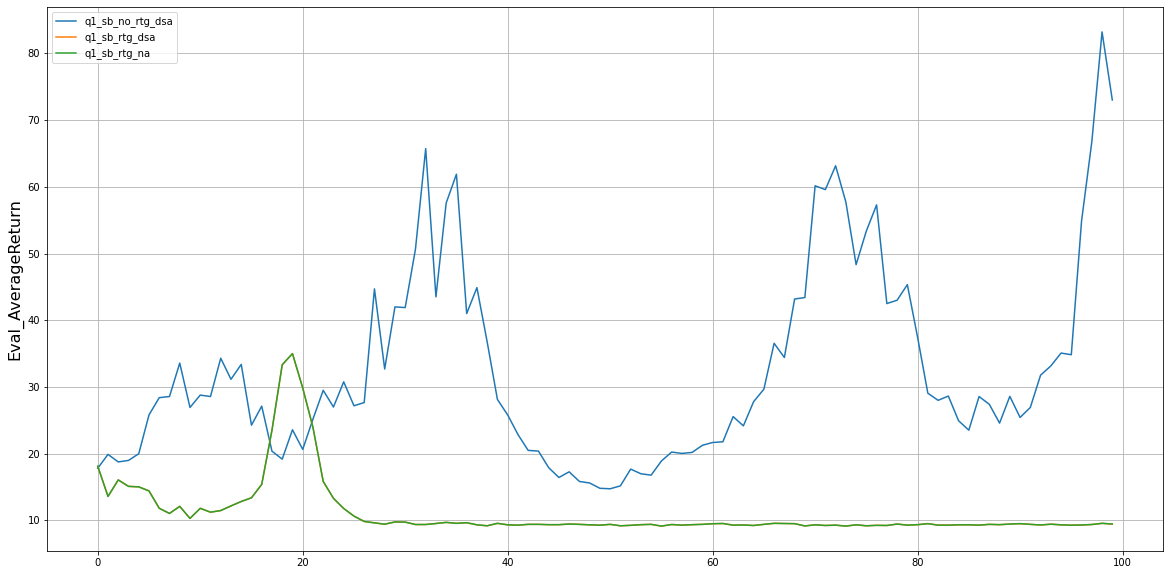

In [26]:
filenames = ['/content/hw2/data/exp_1/q1_sb_no_rtg_dsa_CartPole-v0_14-09-2022_13-49-03/events.out.tfevents.1663163343.9ab68ec909e0',
             '/content/hw2/data/exp_1/q1_sb_rtg_dsa_CartPole-v0_14-09-2022_13-50-29/events.out.tfevents.1663163429.9ab68ec909e0',
             '/content/hw2/data/exp_1/q1_sb_rtg_na_CartPole-v0_14-09-2022_13-47-27/events.out.tfevents.1663163247.9ab68ec909e0',
             ]
labels = ['q1_sb_no_rtg_dsa', 'q1_sb_rtg_dsa', 'q1_sb_rtg_na']
tag = 'Eval_AverageReturn'
Eval_AverageReturn = []
for filename in filenames:
    Eval_AverageReturn.append(read_logs(filename, tag))

plot_info(Eval_AverageReturn, labels, tag)

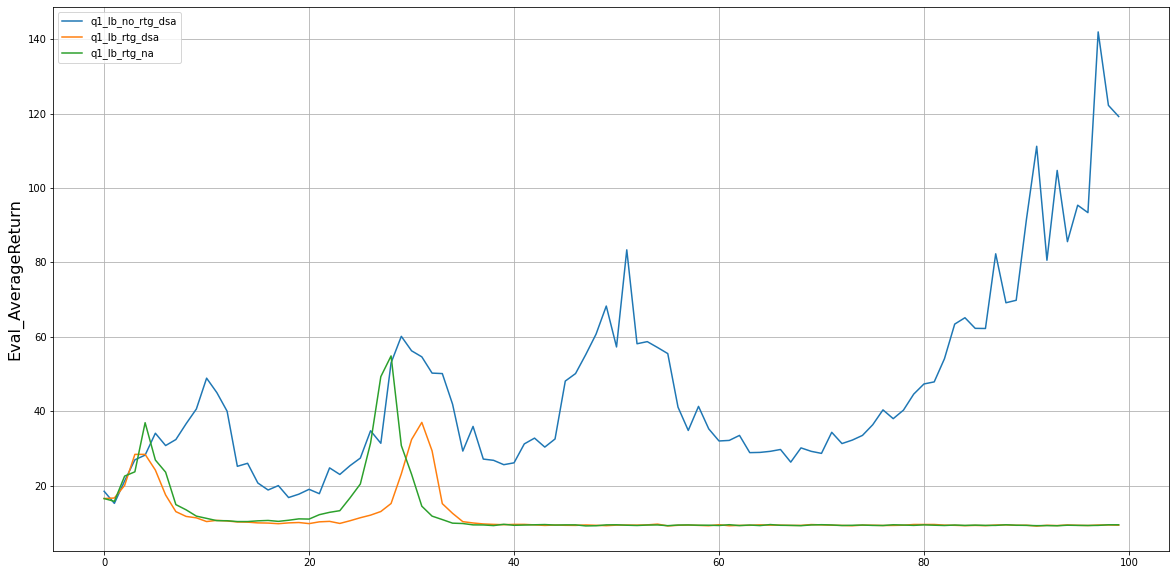

In [27]:
filenames = ['/content/hw2/data/exp_1/q1_lb_no_rtg_dsa_CartPole-v0_14-09-2022_13-53-20/events.out.tfevents.1663163600.9ab68ec909e0',
             '/content/hw2/data/exp_1/q1_lb_rtg_dsa_CartPole-v0_14-09-2022_13-58-28/events.out.tfevents.1663163908.9ab68ec909e0',
             '/content/hw2/data/exp_1/q1_lb_rtg_na_CartPole-v0_14-09-2022_14-03-46/events.out.tfevents.1663164226.9ab68ec909e0']
labels = ['q1_lb_no_rtg_dsa', 'q1_lb_rtg_dsa', 'q1_lb_rtg_na']
tag = 'Eval_AverageReturn'
Eval_AverageReturn = []
for filename in filenames:
    Eval_AverageReturn.append(read_logs(filename, tag))

plot_info(Eval_AverageReturn, labels, tag)

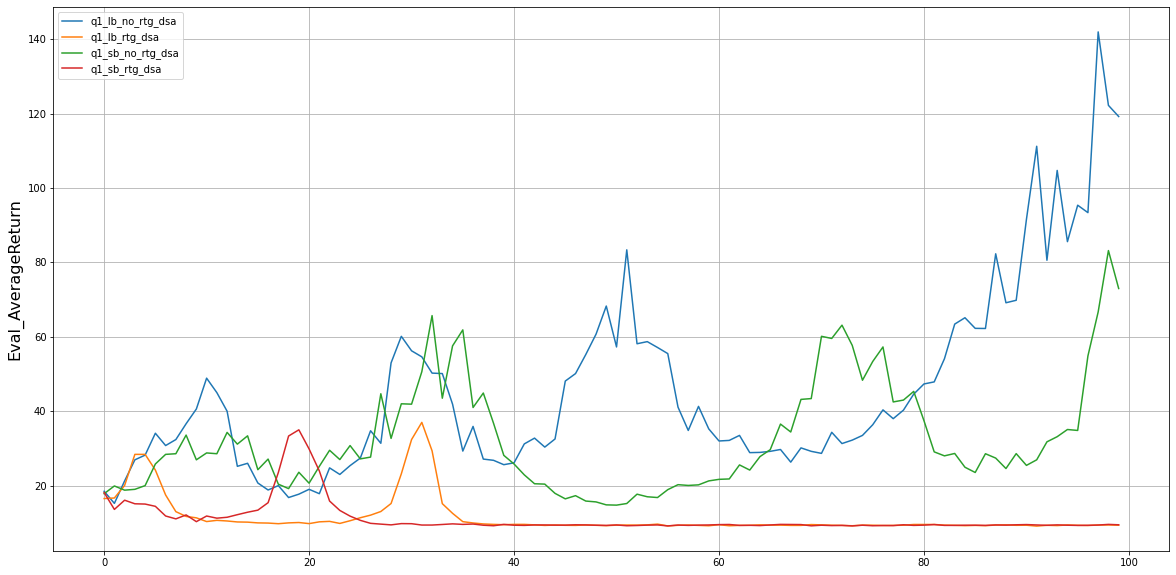

In [28]:
filenames = ['/content/hw2/data/exp_1/q1_lb_no_rtg_dsa_CartPole-v0_14-09-2022_13-53-20/events.out.tfevents.1663163600.9ab68ec909e0',
             '/content/hw2/data/exp_1/q1_lb_rtg_dsa_CartPole-v0_14-09-2022_13-58-28/events.out.tfevents.1663163908.9ab68ec909e0',
             '/content/hw2/data/exp_1/q1_sb_no_rtg_dsa_CartPole-v0_14-09-2022_13-49-03/events.out.tfevents.1663163343.9ab68ec909e0',
             '/content/hw2/data/exp_1/q1_sb_rtg_dsa_CartPole-v0_14-09-2022_13-50-29/events.out.tfevents.1663163429.9ab68ec909e0']
labels = ['q1_lb_no_rtg_dsa', 'q1_lb_rtg_dsa', 'q1_sb_no_rtg_dsa', 'q1_sb_rtg_dsa']
Eval_AverageReturn = []
for filename in filenames:
    Eval_AverageReturn.append(read_logs(filename, tag))

plot_info(Eval_AverageReturn, labels, tag)

# 2.

In [29]:
args = Args()
args.env_name = 'InvertedPendulum-v2'
args.n_iter = 100 # (-n)
args.ep_len = 1000
args.discount = 0.9
args.n_layers = 2
args.size = 64
args.dont_standardize_advantages = False #(-dsa)
args.reward_to_go = True # (-rtg)
args['train_batch_size'] = args['batch_size']

batchs = [1000, 2000, 5000, 10000]
lrates = [0.01, 0.005, 0.0005]

batchs = [1000, 2000, 5000]
lrates = [0.05]

for b in batchs:
    for r in lrates:
        args.batch_size = b #(-b)
        args.learning_rate = r
        args.exp_name = f'q2_b{b}_r{r}'

        create_log_dir(args, '/exp_2')
        print(args.logdir)
        trainer = PG_Trainer(args)
        trainer.run_training_loop()

Выходные данные были обрезаны до нескольких последних строк (5000).


********** Iteration 15 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 55.25
Eval_StdReturn : 20.43128776550293
Eval_MaxReturn : 95.0
Eval_MinReturn : 17.0
Eval_AverageEpLen : 55.25
Train_AverageReturn : 64.70967864990234
Train_StdReturn : 16.81050682067871
Train_MaxReturn : 102.0
Train_MinReturn : 44.0
Train_AverageEpLen : 64.70967741935483
Train_EnvstepsSoFar : 32256
TimeSinceStart : 34.948418378829956
Training Loss : 20.569028854370117
Initial_DataCollection_AverageReturn : 8.652360916137695
Done logging...




********** Iteration 16 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : 25.0625
Eval_StdReturn : 16.184362411499023
Eval_MaxReturn : 72.0
Eval_MinReturn : 5.0
Eval_AverageEpLen : 25.0625
Train_AverageReturn : 50.65853500366211
Train_StdReturn : 25.902828216552734
Train_MaxReturn : 126.0
Train_MinReturn : 7.0
Train_AverageEpLen : 50.65853658536

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


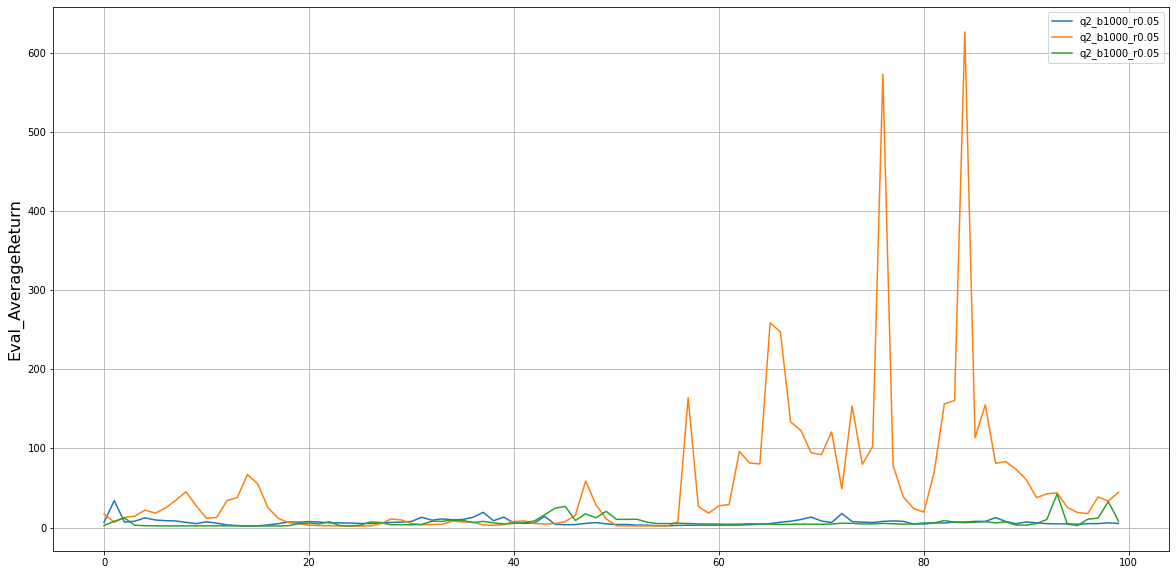

In [30]:
filenames = ['/content/hw2/data/exp_2/q2_b1000_r0.05_InvertedPendulum-v2_14-09-2022_14-17-12/events.out.tfevents.1663165032.9ab68ec909e0',
             '/content/hw2/data/exp_2/q2_b2000_r0.05_InvertedPendulum-v2_14-09-2022_14-19-27/events.out.tfevents.1663165167.9ab68ec909e0',
             '/content/hw2/data/exp_2/q2_b5000_r0.05_InvertedPendulum-v2_14-09-2022_14-23-19/events.out.tfevents.1663165399.9ab68ec909e0',
             ]
labels = ['q2_b1000_r0.05', 'q2_b1000_r0.05', 'q2_b1000_r0.05']

Eval_AverageReturn = []
for filename in filenames:
    Eval_AverageReturn.append(read_logs(filename, tag))

plot_info(Eval_AverageReturn, labels, tag)

Эксперимент 4

In [31]:
args = Args()
args.env_name = 'HalfCheetah-v2'

args.ep_len = 150
args.n_iter = 100 # (-n)
args.discount = 0.95
args.n_layers = 2
args.size = 32

args.dont_standardize_advantages = False #(-dsa)
args.reward_to_go = True # (-rtg)
args.nn_baseline = True

for b in  [10000, 30000, 50000]:
    for r in [0.005, 0.01, 0.02]:
        args.batch_size = b #(-b)
        args.learning_rate = r
        args.exp_name = f'q3_b{b}_r{r}'

        args['train_batch_size'] = args['batch_size']
        create_log_dir(args, '/exp_3')
        print(args.logdir)
        trainer = PG_Trainer(args)
        trainer.run_training_loop()

/content/hw2/data/exp_4/q3_b10000_r0.005_HalfCheetah-v2_14-09-2022_14-34-12
########################
logging outputs to  /content/hw2/data/exp_4/q3_b10000_r0.005_HalfCheetah-v2_14-09-2022_14-34-12
########################
Using GPU id 0


********** Iteration 0 ************



/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:506: UserWarning: WARN: The environment HalfCheetah-v2 is out of date. You should consider upgrading to version `v3` with the environment ID `HalfCheetah-v3`.
  f"The environment {path} is out of date. You should consider "


Выходные данные были обрезаны до нескольких последних строк (5000).
Eval_AverageReturn : -73.9667739868164
Eval_StdReturn : 10.337869644165039
Eval_MaxReturn : -62.94666290283203
Eval_MinReturn : -87.7969970703125
Eval_AverageEpLen : 150.0
Train_AverageReturn : -132.31842041015625
Train_StdReturn : 28.598514556884766
Train_MaxReturn : -74.05435943603516
Train_MinReturn : -219.6001739501953
Train_AverageEpLen : 150.0
Train_EnvstepsSoFar : 1050000
TimeSinceStart : 1163.9147460460663
Training Loss : -9092.0458984375
Initial_DataCollection_AverageReturn : -88.50372314453125
Done logging...




********** Iteration 35 ************

Training...

Beginning logging procedure...

Eval_AverageReturn : -129.5413055419922
Eval_StdReturn : 35.918357849121094
Eval_MaxReturn : -85.14816284179688
Eval_MinReturn : -173.1184539794922
Eval_AverageEpLen : 150.0
Train_AverageReturn : -133.21676635742188
Train_StdReturn : 30.83732032775879
Train_MaxReturn : -49.86714553833008
Train_MinReturn : -225.81671142

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


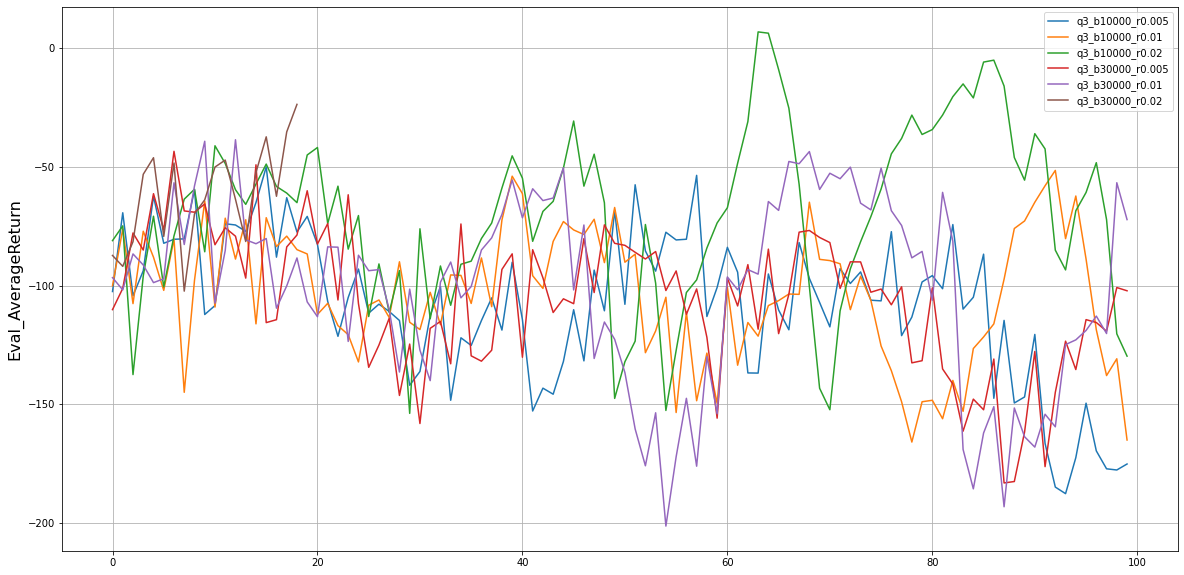

In [32]:
filenames = [
 '/content/hw2/data/exp_3/q3_b10000_r0.005_HalfCheetah-v2_14-09-2022_14-34-12/events.out.tfevents.1663166052.9ab68ec909e0',
 '/content/hw2/data/exp_3/q3_b10000_r0.01_HalfCheetah-v2_14-09-2022_14-53-29/events.out.tfevents.1663167209.9ab68ec909e0',
 '/content/hw2/data/exp_3/q3_b10000_r0.02_HalfCheetah-v2_14-09-2022_15-12-36/events.out.tfevents.1663168356.9ab68ec909e0',
 '/content/hw2/data/exp_3/q3_b30000_r0.005_HalfCheetah-v2_14-09-2022_15-31-50/events.out.tfevents.1663169510.9ab68ec909e0',
 '/content/hw2/data/exp_3/q3_b30000_r0.01_HalfCheetah-v2_14-09-2022_16-26-51/events.out.tfevents.1663172811.9ab68ec909e0',
 '/content/hw2/data/exp_3/q3_b30000_r0.02_HalfCheetah-v2_14-09-2022_17-21-46/events.out.tfevents.1663176106.9ab68ec909e0',
]
labels = [ 'q3_b10000_r0.005', 'q3_b10000_r0.01', 'q3_b10000_r0.02', 
          'q3_b30000_r0.005', 'q3_b30000_r0.01', 'q3_b30000_r0.02']


Eval_AverageReturn = []
for filename in filenames:
    Eval_AverageReturn.append(read_logs(filename, tag))

plot_info(Eval_AverageReturn, labels, tag)

In [ ]:
!zip -r h2_data.zip /content/hw2/data

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

%load_ext tensorboard
%tensorboard --logdir /content/cds_rl_2022/hw2/data